[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gabrielkasmi/ot_gan_ensae/blob/master/vanilla_gan/visualize_vanilla_gan.ipynb)


# Some samples from a standard GAN

## Visualize the samples gathered during training

In [0]:
# Libraries

import matplotlib.pyplot as plt
% matplotlib inline
import pickle as pkl
import numpy as np
import torch
from utilities.gan_class import *

In [0]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')

In [0]:
# Load samples from generator, taken while training
with open('../model/train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

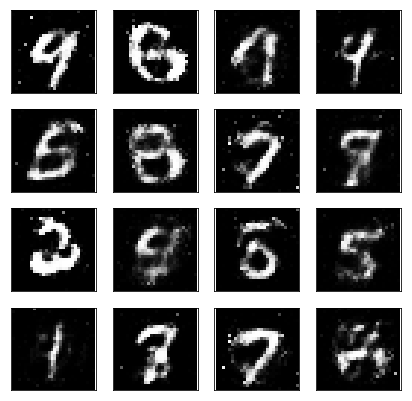

In [0]:
# -1 indicates final epoch's samples (the last in the list)
view_samples(-1, samples)

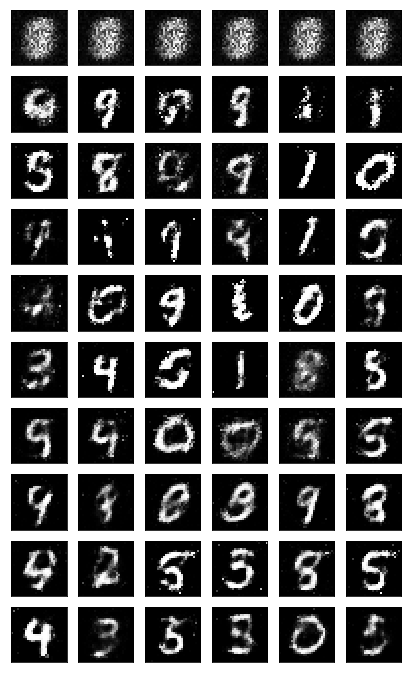

In [0]:
rows = 10 # split epochs into 10, so 100/10 = every 10 epochs
cols = 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        img = img.detach()
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
plt.savefig('../img/traning_evolution.png')

## Plot some samples generated by the model

In [0]:
# load the pre-trained model, to see if it works.
model = torch.load('../model/generator.pkl')

/Users/Gabriel/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


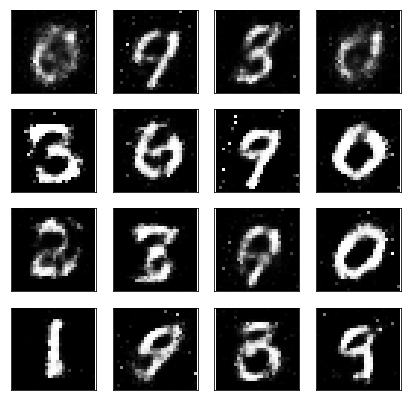

In [0]:
# randomly generated, new latent vectors
z_size = 100
sample_size=16
rand_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
rand_z = torch.from_numpy(rand_z).float()

model.eval() # eval mode
# generated samples
rand_images = model(rand_z)

# 0 indicates the first set of samples in the passed in list
# and we only have one batch of samples, here
view_samples(0, [rand_images])
plt.savefig('../img/generated_images.png')